<a href="https://colab.research.google.com/github/vsolodkyi/NeuralNetworks_SkillBox/blob/main/module_3/keras_training_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по обучению моделей

В этом практическом задании мы закрепим на практике как обучать модели в tensorflow на синтетических данных. В задачах ниже необходимо получить точность выше 90%. Советуем не сдаваться на этом -- везде реально получить 100%. А в последнем задании можно получить бонусные баллы за модель с минимальным количеством параметров.

In [1]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
print(tf.__version__)

2.8.2


In [2]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits
    
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy() 
    
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        

def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

**1a**. Начнем с классической задачи -- XOR.

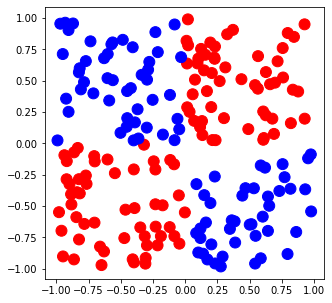

In [3]:
X = np.random.rand(200, 2) - 0.5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X*2
show_data(X, y)

In [19]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    ~3 скрытых слоев достаточно
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор 
# 4. определите лосс (не забудьте указать from_logits=True!!) 

model.add(tf.keras.layers.Dense(units=10, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)



# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 1s 6ms/step - loss: 0.6702 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6614 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6429 - accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6329 - accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6229 - accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6103 - accuracy: 0.5000
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.5982 - accuracy: 0.5000
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.5862 - accuracy: 0.5000
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 0.5726 - accuracy: 0.6100
Epoch 11/200
2/2 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.0133 - accuracy: 1.0000
Perfect!


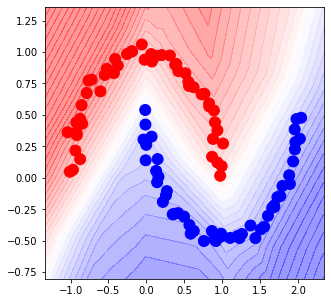

In [20]:
limits = [[-0.6, 0.6], [-0.6, 0.6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

**1b**

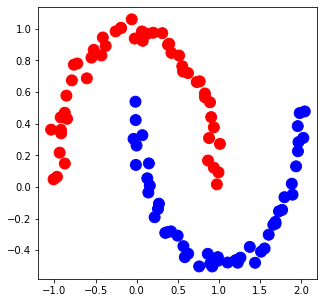

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.04)
show_data(X, y)

In [16]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    ~3 скрытых слоев достаточно
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор 
# 4. определите лосс (не забудьте указать from_logits=True!!) 

model.add(tf.keras.layers.Dense(units=10, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-2)





# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 1s 10ms/step - loss: 0.6738 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 0.5910 - accuracy: 0.5500
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 0.4771 - accuracy: 0.7800
Epoch 4/200
2/2 [==============================] - 0s 14ms/step - loss: 0.3806 - accuracy: 0.8300
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.3392 - accuracy: 0.8400
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.3191 - accuracy: 0.8500
Epoch 7/200
2/2 [==============================] - 0s 15ms/step - loss: 0.2945 - accuracy: 0.8600
Epoch 8/200
2/2 [==============================] - 0s 9ms/step - loss: 0.2734 - accuracy: 0.8800
Epoch 9/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2706 - accuracy: 0.8700
Epoch 10/200
2/2 [==============================] - 0s 15ms/step - loss: 0.2788 - accuracy: 0.8800
Epoch 11/200
2/2 [===

4/4 [==============================] - 0s 3ms/step - loss: 1.0327e-04 - accuracy: 1.0000
Perfect!


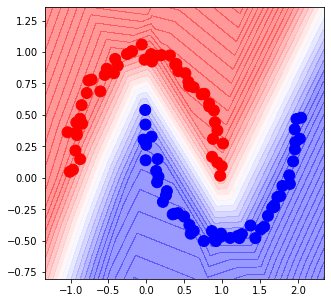

In [17]:
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

**1c**

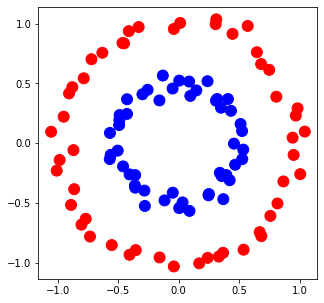

In [21]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.05)
show_data(X, y)

In [30]:
model = tf.keras.Sequential()
# <YOUR CODE STARTS HERE>
# 1. добавьте скрытые слои в модель (в первом из них не забудьте про input_shape)
#    Постарайтесь сделать количество слоев и нейронов минимальным.
# 2. добавьте выходной слой он должен быть без активации
# 3. определите оптимизатор 
# 4. определите лосс (не забудьте указать from_logits=True!!) 

model.add(tf.keras.layers.Dense(input_shape=(2,), activation='relu', units=4))
#model.add(tf.keras.layers.Dense(units=2, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-2)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)




# <YOUR CODE ENDS HERE>

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6883 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 0.6807 - accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6727 - accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6588 - accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6515 - accuracy: 0.5000
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6439 - accuracy: 0.5000
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.5000
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6246 - accuracy: 0.5000
Epoch 11/200
2/2 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 1.0000
Perfect!
Bonus points!


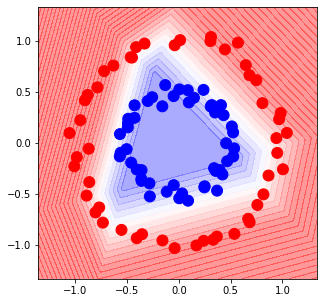

In [31]:
accuracy = eval_model(model, X, y)
if model.count_params() < 18 and accuracy == 1.0:
    print("Bonus points!")
else:
    print(f"Model has {model.count_params()} parameters")

show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)